In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [12]:
data = pd.read_csv("D:\\techstack\\ab sir\\Credit Card Transactions.csv")
data

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1
5,100006,A14,36,A32,A46,9055,A65,A73,2,A93,...,35,A143,A153,1,A172,2,A192,A201,0,1
6,100007,A14,24,A32,A42,2835,A63,A75,3,A93,...,53,A143,A152,1,A173,1,A191,A201,0,1
7,100008,A12,36,A32,A41,6948,A61,A73,2,A93,...,35,A143,A151,1,A174,1,A192,A201,0,1
8,100009,A14,12,A32,A43,3059,A64,A74,2,A91,...,61,A143,A152,1,A172,1,A191,A201,0,1
9,100010,A12,30,A34,A40,5234,A61,A71,4,A94,...,28,A143,A152,2,A174,1,A191,A201,1,1


In [13]:
data.shape

(5000, 23)

In [14]:
data.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [16]:
data.describe

<bound method NDFrame.describe of       Customer_ID Status_Checking_Acc  Duration_in_Months Credit_History  \
0          100001                 A11                   6            A34   
1          100002                 A12                  48            A32   
2          100003                 A14                  12            A34   
3          100004                 A11                  42            A32   
4          100005                 A11                  24            A33   
5          100006                 A14                  36            A32   
6          100007                 A14                  24            A32   
7          100008                 A12                  36            A32   
8          100009                 A14                  12            A32   
9          100010                 A12                  30            A34   
10         100011                 A12                  12            A32   
11         100012                 A11                 

In [20]:
fraud = data[data['Default_On_Payment']==1]
valid = data[data['Default_On_Payment']==0]

outlier_fraction = len(fraud)/len(valid)

print(outlier_fraction)

print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

0.42653352353780316
Fraud cases: 1495
Valid cases: 3505


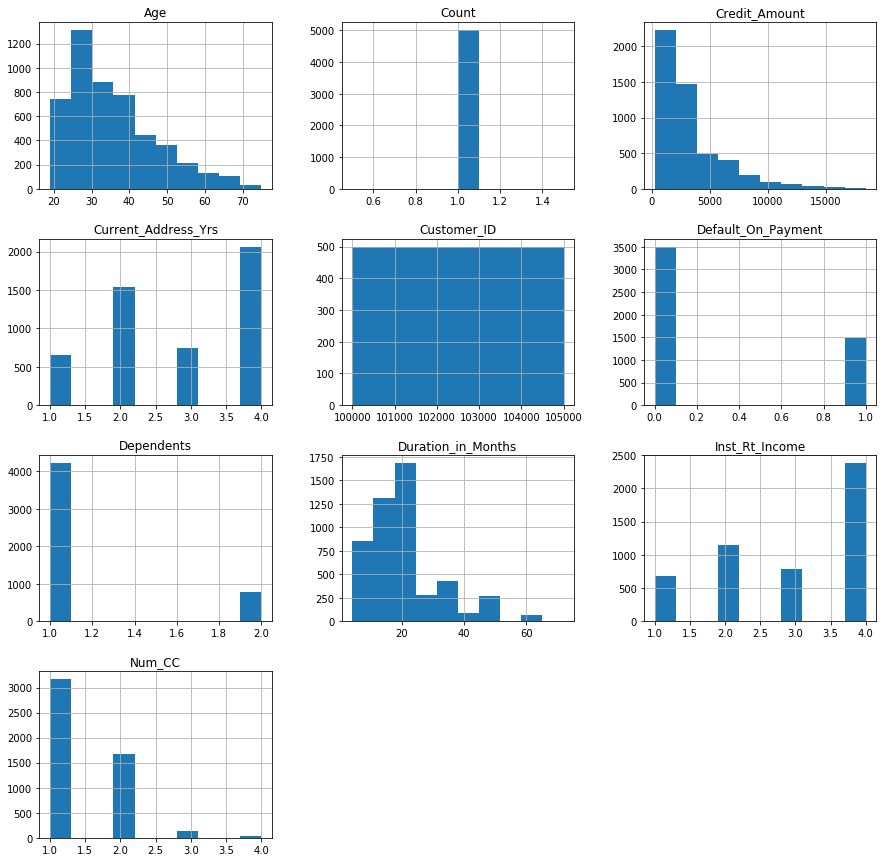

In [27]:
data.hist(figsize=(15,15))
plt.show()

In [40]:
correl = data.corr()
correl

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count
Customer_ID,1.000000,0.006158,0.002698,0.002015,0.004739,-0.002019,0.004568,0.005332,0.007682,NaN
Duration_in_Months,0.006158,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.210222,NaN
Credit_Amount,0.002698,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.152812,NaN
Inst_Rt_Income,0.002015,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.074374,NaN
Current_Address_Yrs,0.004739,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.004643,NaN
Age,-0.002019,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.088612,NaN
Num_CC,0.004568,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.044236,NaN
Dependents,0.005332,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.002082,NaN
Default_On_Payment,0.007682,0.210222,0.152812,0.074374,0.004643,-0.088612,-0.044236,-0.002082,1.000000,NaN
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
X=data.drop(['Default_On_Payment'],axis=1)
X

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,100006,A14,36,A32,A46,9055,A65,A73,2,A93,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,100007,A14,24,A32,A42,2835,A63,A75,3,A93,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,100008,A12,36,A32,A41,6948,A61,A73,2,A93,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,100009,A14,12,A32,A43,3059,A64,A74,2,A91,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,100010,A12,30,A34,A40,5234,A61,A71,4,A94,...,A123,28,A143,A152,2,A174,1,A191,A201,1


In [34]:
X.shape

(5000, 22)

In [31]:
y=data['Default_On_Payment']
y

0       0
1       0
2       0
3       0
4       1
5       0
6       0
7       0
8       0
9       1
10      1
11      1
12      0
13      1
14      0
15      1
16      0
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      1
       ..
4970    0
4971    0
4972    1
4973    1
4974    0
4975    0
4976    0
4977    0
4978    1
4979    1
4980    1
4981    1
4982    0
4983    1
4984    0
4985    0
4986    0
4987    0
4988    0
4989    0
4990    0
4991    0
4992    0
4993    0
4994    0
4995    0
4996    0
4997    0
4998    1
4999    0
Name: Default_On_Payment, Length: 5000, dtype: int64

In [35]:
from sklearn import preprocessing

In [36]:
encoder = preprocessing.LabelEncoder()

for i in X.columns:
    if isinstance(X[i][0], str):
            X[i] = encoder.fit_transform(X[i])

In [39]:
X.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Count
0,100001,0,6,4,4,1169,4,4,4,2,...,0,67,2,1,2,2,1,1,0,1
1,100002,1,48,2,4,5951,0,2,2,1,...,0,22,2,1,1,2,1,0,0,1
2,100003,3,12,4,7,2096,0,3,2,2,...,0,49,2,1,1,1,2,0,0,1
3,100004,0,42,2,3,7882,0,3,2,2,...,1,45,2,2,1,2,2,0,0,1
4,100005,0,24,3,0,4870,0,2,3,2,...,3,53,2,2,2,2,2,0,0,1


In [60]:
X.shape

(5000, 22)

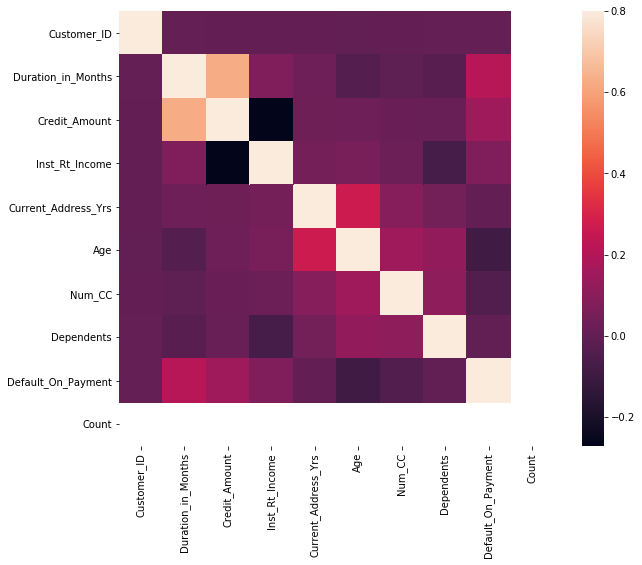

In [42]:
fig = plt.figure(figsize=(10,8))

sns.heatmap(correl, vmax=0.8, square=True)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
model.fit(X_train,y_train)

C:\Users\New\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
pred = model.predict(X_test)

# Checking accuracy

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,pred)

0.726

In [61]:
X.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker', 'Count'],
      dtype='object')

In [74]:
from IPython.display import display
pd.options.display.max_columns=30

In [75]:
X.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Count
0,100001,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0,1
1,100002,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0,1
2,100003,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0,1
3,100004,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0,1
4,100005,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0,1


# For Checking Cases

In [76]:
pred=model.predict([[101225,0,9,3,4,80000,2,3,3,1,1,3,2,23,2,2,1,2,1,2,1,1]])
pred                                                                          #output 1 - fraud case

array([1], dtype=int64)

In [77]:
pred=model.predict([[102341,0,6,4,4,80000,2,3,3,1,1,3,2,23,2,2,1,2,1,2,1,1]])
pred                                                                         #output 0 - Valid case

array([0], dtype=int64)